In [7]:
# import dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

In [10]:
# understanding the data 
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
# access data attributes
dataset = boston.data
for name,index in enumerate(boston.feature_names):
    print(index,name)

CRIM 0
ZN 1
INDUS 2
CHAS 3
NOX 4
RM 5
AGE 6
DIS 7
RAD 8
TAX 9
PTRATIO 10
B 11
LSTAT 12


In [12]:
# reshaping data
data = dataset[:,12].reshape(-1,1)

In [13]:
# shape of the data
np.shape(dataset)

(506, 13)

In [14]:
# target values
target = boston.target.reshape(-1,1)

In [15]:
# shape of target
np.shape(target)

(506, 1)

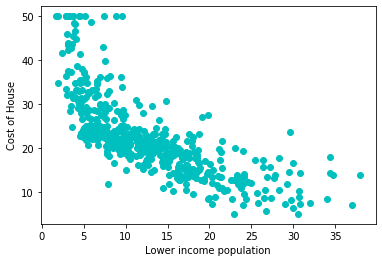

In [17]:
# ploting the data
%matplotlib inline
plt.scatter(data,target,color='c')
plt.xlabel('Lower income population')
plt.ylabel('Cost of House')
plt.show()

In [19]:
#Linear regression
from sklearn.linear_model import LinearRegression

# creating a regression model
reg = LinearRegression()

# fit the model
reg.fit(data, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
#prediction
pred = reg.predict(data)

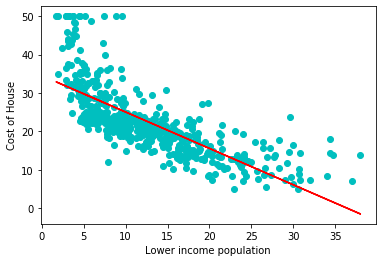

In [21]:
#plotting the regression line
%matplotlib inline
plt.scatter(data,target,color = 'c')
plt.plot(data,pred,color = 'red')
plt.xlabel('Lower income population')
plt.ylabel('Cost of House')
plt.show()

In [25]:
# Lasso
from sklearn.linear_model import Lasso

# creating a regression model
reg1 = Lasso()

# fit the model
reg1.fit(data, target)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [28]:
#prediction
pred1 = reg1.predict(data)

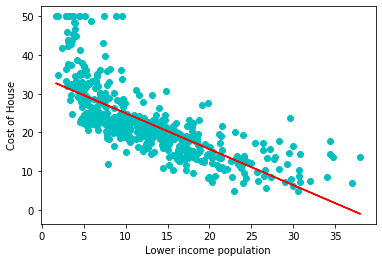

In [29]:
#plotting the Lasso
%matplotlib inline
plt.scatter(data,target,color = 'c')
plt.plot(data,pred1,color = 'red')
plt.xlabel('Lower income population')
plt.ylabel('Cost of House')
plt.show()

In [30]:
# Ridge
from sklearn.linear_model import Ridge

# creating a regression model
reg2 = Ridge()

# fit the model
reg2.fit(data, target)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [31]:
#prediction
pred2 = reg2.predict(data)

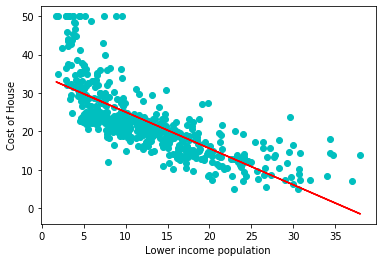

In [32]:
#plotting the Lasso
%matplotlib inline
plt.scatter(data,target,color = 'c')
plt.plot(data,pred2,color = 'red')
plt.xlabel('Lower income population')
plt.ylabel('Cost of House')
plt.show()

In [33]:
# circumventing curve issue using polynomial model
from sklearn.preprocessing import PolynomialFeatures

# to allow merging of models
from sklearn.pipeline import make_pipeline

In [44]:
model = make_pipeline(PolynomialFeatures(3), reg)

In [45]:
model.fit(data, target)

C:\Users\Yash Sharma\Anaconda33\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.931831140283975, tolerance: 4.2716295415019765
  positive)


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [46]:
pred = model.predict(data)

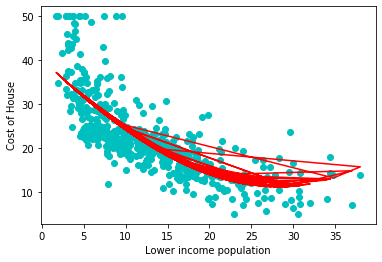

In [37]:
#plotting the Polynomial
%matplotlib inline
plt.scatter(data,target,color = 'c')
plt.plot(data,pred,color = 'red')
plt.xlabel('Lower income population')
plt.ylabel('Cost of House')
plt.show()

In [49]:
#r_2 metric
from sklearn.metrics import r2_score

In [50]:
# predict
r2_score(pred,target)

0.37503576413065254